<a href="https://colab.research.google.com/github/priyanka12177/data_projects-ADVDS/blob/Project1/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
# NumPy has support for large, multi-dimensional arrays and matrices, along with 
# a large collection of high-level mathematical functions to operate on these arrays.
# Import matplotlib  to visualize the data
# Import seaborn to visualize whether the data is distributed properly
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as l

In [3]:
#Read raw filefrom github into a dataframe
#forest_data: Amounts of area burn in the forest because of different parameters like Temperature,humidity,wind and rain

df = pd.read_csv('https://raw.githubusercontent.com/priyanka12177/data_projects-ADVDS/Project1/forestfires.csv')

In [4]:
#head function is used to get the first 5 rows
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


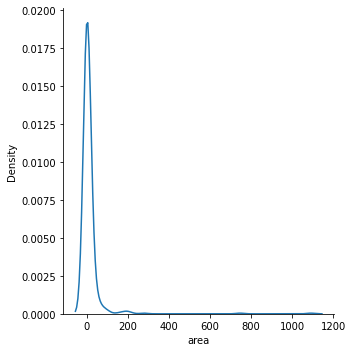

In [5]:
# plotting the area data to see whether the data is  skewed
sns.displot(df, x="area", kind="kde")

In [6]:
#checking if any column had missing values  in the dataframe
df.isnull().sum().sort_values( ascending=False)

area     0
rain     0
wind     0
RH       0
temp     0
ISI      0
DC       0
DMC      0
FFMC     0
day      0
month    0
Y        0
X        0
dtype: int64

In [7]:
#applying log+1 function to the area data to make it properly distributed . since some of values are zero to avoid nans I have added 1

df['log_area']=np.log(df["area"]+1)

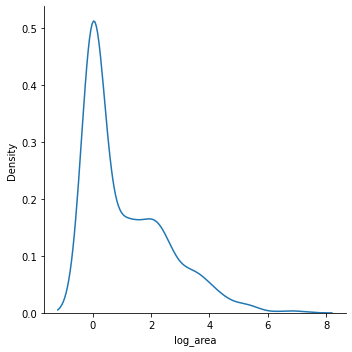

In [8]:
#plotting the area data after performing log+1 function
sns.displot(df, x="log_area", kind="kde")

In [9]:
# simple linear regression for the forest area burn with repect to temperatures
lm = l.LinearRegression()

# another way to reshape is to add an extra column; -1 means we don't specify #rows
# x is temperature and y is area
x = df['temp'].values.reshape(-1,1)
y = df['log_area'].values.reshape(-1,1)

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(0.86770667204135, 0.012881408522962963)

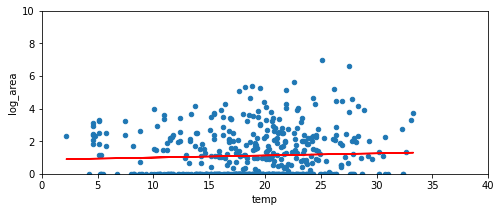

In [15]:
# scatter plot for the forest area burn with repect to temperatures and the fitted model in red
df.plot(kind='scatter', x='temp', y='log_area', figsize=(8, 3))

plt.axis([0, 40, 0, 10])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [16]:
# Split the data into training and testing sets
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [17]:
# checking the number of rows and columns for train data for area vs temp
x_train.shape

(413, 1)

In [18]:
# checking the number of rows and columns for test data for area vs temp
x_test.shape

(104, 1)

In [19]:
#fitting the linear regression on training data for area vs temp
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [0.84217833]
Slope : [[0.01502745]]


Linear Model: Area = 0.84217 + 0.01502 * temp

In [20]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)

m1_r2_score = r2_score(y_test, y_test_pred)
m1_mse = mean_squared_error(y_test, y_test_pred)

print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: -0.004574997224865873
Mean squared error: 1.7878789957846166


In [21]:
#simple linear regression for the forest area burn and relative humidity
lm = l.LinearRegression()

# another way to reshape is to add an extra column; -1 means we don't specify #rows
# x is temperature and y is area

x = df['RH'].values.reshape(-1,1)
y = df['log_area'].values.reshape(-1,1)



# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(1.3147046255602883, -0.004598941815809566)

Linear Model: Area = 1.3147-0.00459 * RH

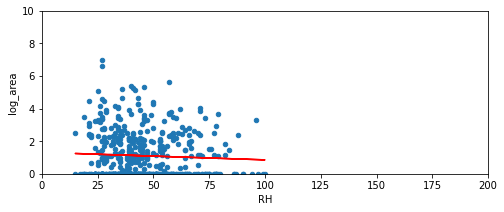

In [25]:
# scatter plot for the forest area burn with repect to Relative humidity and fitted model in red
df.plot(kind='scatter', x='RH', y='log_area', figsize=(8, 3))

plt.axis([0, 200, 0, 10])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [26]:
# Split the data into training and testing sets for  area vs relative humidity
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [27]:
# checking the number of rows and columns for train data for area vs relative humidity
x_train.shape

(413, 1)

In [28]:
# checking the number of rows and columns for train data for area vs relative humidity
x_test.shape

(104, 1)

In [29]:
#fitting the linear regression on training data for area vs relative humidity
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [1.30848473]
Slope : [[-0.00419028]]


Linear Model: Area =1.3084-0.00419* RH

In [30]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)

m2_r2_score = r2_score(y_test, y_test_pred)
m2_mse = mean_squared_error(y_test, y_test_pred)

print('R2 score of RH:',            r2_score(y_test, y_test_pred))
print('Mean squared error for RH:', mean_squared_error(y_test, y_test_pred))

R2 score of RH: 0.002807391126103731
Mean squared error for RH: 1.7747402882636398


In [31]:
# Let's use simple linear regression for the forest area burn and wind
lm = l.LinearRegression()

# another way to reshape is to add an extra column; -1 means we don't specify #rows
# x is wind and y is area

x = df['wind'].values.reshape(-1,1)
y = df['log_area'].values.reshape(-1,1)

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(0.9010067751456189, 0.052274718553652864)

Linear Model: Area = 0.90100 + 0.05227 * wind

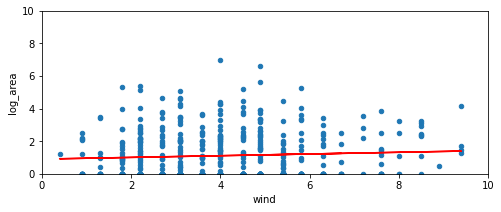

In [33]:
# scatter plot for the forest area burn with repect to wind and fitted model in red
df.plot(kind='scatter', x='wind', y='log_area', figsize=(8, 3))

plt.axis([0, 10, 0, 10])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [34]:
# Let's experiment again, but this time split the data into training and testing sets for area vs wind
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [35]:
# checking the number of rows and columns for train data for area vs wind
x_train.shape

(413, 1)

In [36]:
# checking the number of rows and columns for train data for area vs wind
x_test.shape

(104, 1)

In [37]:
#fitting the linear regression on training data for area vs wind
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [0.91451685]
Slope : [[0.05194382]]


Linear Model: Area = 0.9145+ 0.0519 * wind

In [38]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)

m3_r2_score = r2_score(y_test, y_test_pred)
m3_mse = mean_squared_error(y_test, y_test_pred)


print('R2 score of wind:',            r2_score(y_test, y_test_pred))
print('Mean squared error for wind:', mean_squared_error(y_test, y_test_pred))

R2 score of wind: 0.0023451377048033795
Mean squared error for wind: 1.7755629776446773


In [39]:
# Let's use simple linear regression for the forest area burn and Rain
lm = l.LinearRegression()

# another way to reshape is to add an extra column; -1 means we don't specify #rows
# x is rain and y is area

x = df['rain'].values.reshape(-1,1)
y = df['log_area'].values.reshape(-1,1)

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(1.1086395750726816, 0.11014824513401716)

Linear Model: Area = 1.10863 -0.11014 * rain

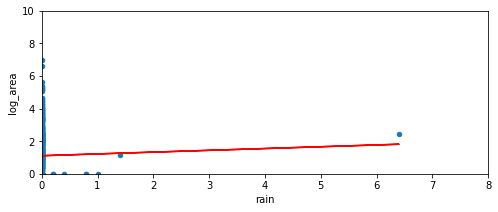

In [42]:
# scatter plot for the forest area burn with repect to rain
df.plot(kind='scatter', x='rain', y='log_area', figsize=(8, 3))

plt.axis([0, 8, 0, 10])

plt.plot(x, t0 + t1*x, "r")

plt.show()

In [43]:
# Let's experiment again, but this time split the data into training and testing sets area vs rain
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [44]:
# checking the number of rows and columns for train data for area vs rain
x_train.shape

(413, 1)

In [45]:
# checking the number of rows and columns for train data for area vs rain
x_test.shape

(104, 1)

In [46]:
#fitting the linear regression on training data for area vs rain
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [1.12169432]
Slope : [[0.12227983]]


Linear Model: Area = 1.1216-0.1222 * rain

In [47]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)

m4_r2_score = r2_score(y_test, y_test_pred)
m4_mse = mean_squared_error(y_test, y_test_pred)


print('R2 score of rain:',            r2_score(y_test, y_test_pred))
print('Mean squared error for rain:', mean_squared_error(y_test, y_test_pred))

R2 score of rain: -0.0033158753354052273
Mean squared error for rain: 1.7856380903415006


In [48]:
#Creating Dataframes for different models
df1 = pd.DataFrame({'R2_square': m1_r2_score, 'MSE_ERROR': m1_mse}, index=['model1'])
df2 = pd.DataFrame({'R2_square': m2_r2_score, 'MSE_ERROR': m2_mse}, index=['model2'])
df3 = pd.DataFrame({'R2_square': m3_r2_score, 'MSE_ERROR': m3_mse}, index=['model3'])
df4 = pd.DataFrame({'R2_square': m4_r2_score, 'MSE_ERROR': m4_mse}, index=['model4'])

In [49]:
# Concatinating the dataframes to get the table
final = pd.concat([df1,df2,df3,df4])
final


,R2_square,MSE_ERROR
model1,-0.004575,1.787879
model2,0.002807,1.774740
model3,0.002345,1.775563
model4,-0.003316,1.785638


**Summary**

Ran multiple linear regression models with Area as target variable  and input as temp , rh, wind and rain individually.

As Area is skewed we have done the log transformation.

I have used 80% and 20%  split and evaluted the model on test data for all the different models. 

As we can see  in the table above none of the variables were doing well and of the four  rh is better.


In [ ]:
Summary 